In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from statistics import mode
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

warnings.filterwarnings('ignore')

DATA = {
    'train': 'drive/My Drive/KAGGLE/Titanic_ML/train.csv',
    'test': 'drive/My Drive/KAGGLE/Titanic_ML/test.csv'
}



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# VISUALIZE DATA

In [ ]:
train = pd.read_csv(DATA['train'])
test = pd.read_csv(DATA['test'])

train.shape

(891, 12)

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fortune, Miss. Mabel Helen",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


STATIC SURVIVALS

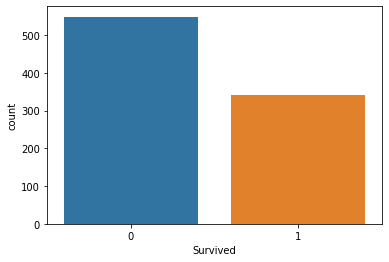

In [ ]:
sns.countplot(train['Survived'])

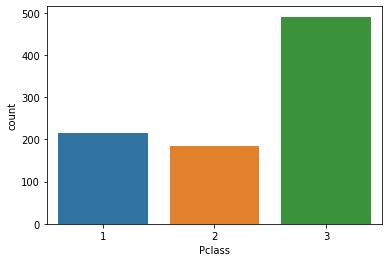

In [ ]:
sns.countplot(train['Pclass'])

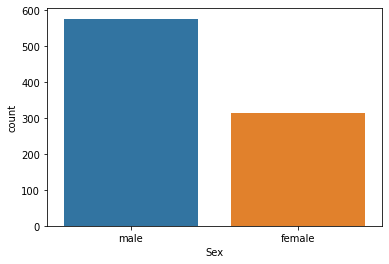

In [ ]:
sns.countplot(train['Sex'])

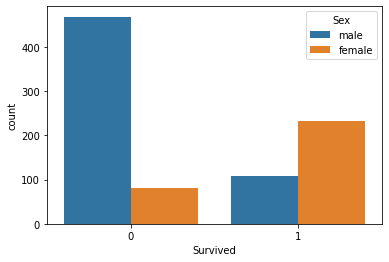

In [ ]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

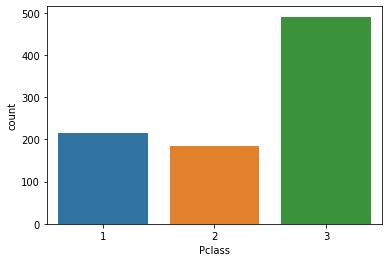

In [ ]:
sns.countplot(train['Pclass'])

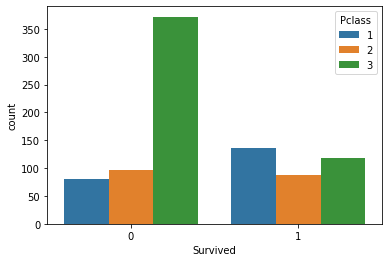

In [ ]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

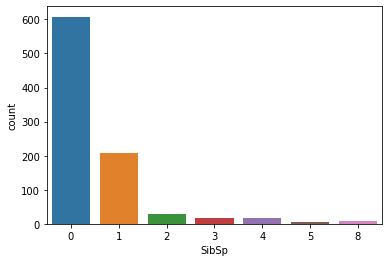

In [ ]:
sns.countplot(train['SibSp'])

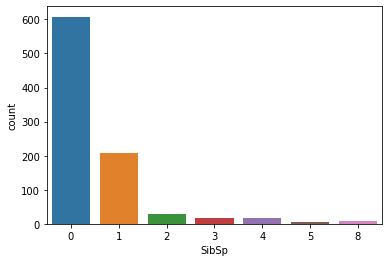

In [ ]:
sns.countplot(train['SibSp'])

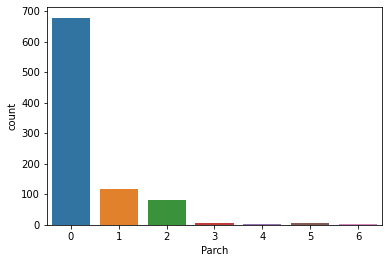

In [ ]:
sns.countplot(train['Parch'])

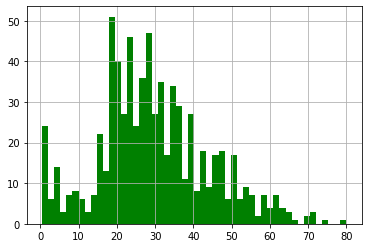

In [ ]:
import random
train['Age'].hist(bins = 50, color = 'green')
#train['Age'].unique()

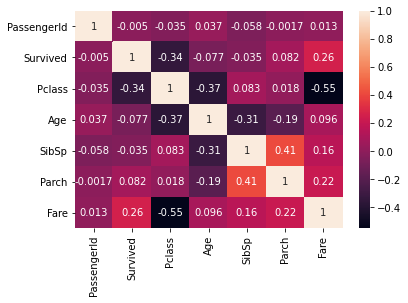

In [ ]:
sns.heatmap(train.corr(), annot = True)

**Drop 'Cabin' column**

In [ ]:
train.drop('Cabin', axis = 1, inplace = True)
# train.head()

**Average Age of Pclass**

In [ ]:
age_class = train.groupby('Pclass')['Age']
age_class.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

**Give average age to Nan age (in same class)**

In [ ]:
train.loc[train['Age'].isnull(), 'Age'] = train.groupby('Pclass')['Age'].transform('median')

train['Age'].isnull().sum()

0

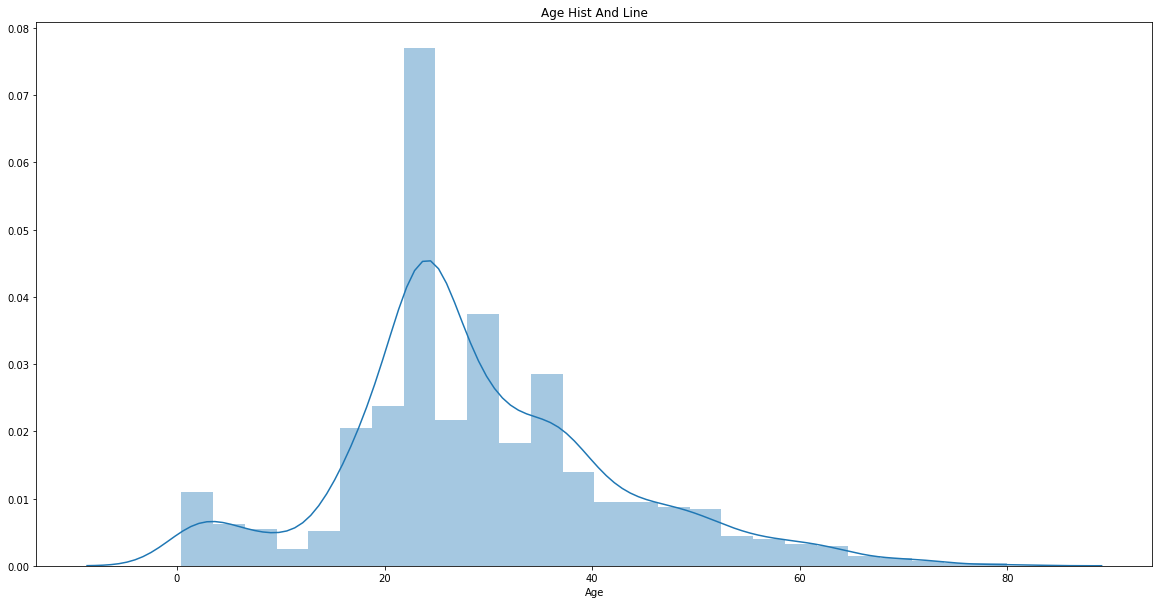

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(train['Age'])
plt.xlabel('Age')
plt.title('Age Hist And Line')
plt.show()

In [ ]:
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

train['Embarked'][train['Embarked'] == 'S'] = 0
train['Embarked'][train['Embarked'] == 'C'] = 1
train['Embarked'][train['Embarked'] == 'Q'] = 2

test['Embarked'][test['Embarked'] == 'S'] = 0
test['Embarked'][test['Embarked'] == 'C'] = 1
test['Embarked'][test['Embarked'] == 'Q'] = 2


In [ ]:
train.drop(['Name','Ticket'],axis = 1, inplace =True)

# PREDICT (USING RANDOM FOREST & LOGISTIC REGRESSION)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['Survived','PassengerId'], axis =1), train['Survived'], test_size = 0.25, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(668, 7)
(223, 7)
(668,)
(223,)


In [ ]:
Y_train.describe()

count    668.000000
mean       0.369760
std        0.483101
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

**LOGISTIC REGRESSION**

In [ ]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logreg.predict(X_test)
print(predictions)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0]


In [ ]:
c_matrix = confusion_matrix(Y_test, predictions)
# print(c_matrix)
tn, fp, fn, tp = c_matrix.ravel()
# print(tn, fp, fn, tp)
LR_acc2 = (tn + tp)/ (tn + fp + fn + tp)
# print(LR_acc2)

In [ ]:
LR_acc = accuracy_score(Y_test, predictions)
print('Logistic_Regression accuracy: ',str(round(LR_acc, 2)))

Logistic_Regression accuracy:  0.81


**KFOLD**

In [ ]:
KF = KFold(n_splits = 5, random_state = 2)
print(cross_val_score(logreg, X_test,Y_test, cv = KF).mean())

0.767070707070707


**RANDOM FOREST**

In [ ]:
RF = RandomForestClassifier(random_state = 3)

In [ ]:
param_grid = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [100, 300, 500],
    'max_features': ['log2','auto','sqrt'],
    'max_depth': [3, 5 ,7]
}

In [ ]:
RF_GRIDCV = GridSearchCV(estimator = RF, param_grid = param_grid , cv = 5)
RF_GRIDCV.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=3,
                                   

In [ ]:
RF_GRIDCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
Criterion = RF_GRIDCV.best_params_['criterion']
Max_depth = RF_GRIDCV.best_params_['max_depth']
Max_features = RF_GRIDCV.best_params_['max_features']
N_estimators = RF_GRIDCV.best_params_['n_estimators']

In [ ]:
RF_MODEL = RandomForestClassifier(criterion= Criterion,
                                  max_depth = Max_depth,
                                  max_features= Max_features,
                                  n_estimators = N_estimators,
                                  random_state = 0)
RF_MODEL.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
RF_predictions = RF_MODEL.predict(X_test)
print('Random Forest accuracy: ',str(round(accuracy_score(Y_test,RF_predictions),2)))



Random Forest accuracy:  0.78


In [ ]:
print(predictions)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0]


In [ ]:
test["Age"] = test["Age"].fillna(-0.5)
test["Fare"] = test["Fare"].fillna(-0.5)

In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,-0.5,1,1,2668,22.3583,NaN,C


In [ ]:
predictions = logreg.predict(test.drop(['PassengerId','Name', 'Ticket','Cabin'], axis = 1))
output = pd.DataFrame({ "PassengerId" : test['PassengerId'], "Survived": predictions })
output.to_csv("submission1.csv", index=False)